In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class LinearRegression:

    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights, self.bias = None, None
        self.X, self.Y = None, None
        self.loss_history = []

    def fit(self, X, Y):
        self.X, self.Y = np.asarray(X), np.asarray(Y)
        _, n_features = self.X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            self.update_weights()

        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)

        n_samples, _ = self.X.shape
        dw = (1 / n_samples) * np.dot(self.X.T, (Y_pred - self.Y))
        db = (1 / n_samples) * np.sum(Y_pred - self.Y)

        self.weights = self.weights - self.learning_rate * dw
        self.bias = self.bias - self.learning_rate * db

        loss = np.mean((Y_pred - self.Y) ** 2)
        self.loss_history.append(loss.item())

        return self
    
    def predict(self, X):
        return np.dot(np.asarray(X), self.weights) + self.bias
    
    def get_weights(self):
        return self.weights
    
    def get_bias(self):
        return self.bias
    
    def __str__(self):
        return f"Веса: {self.weights}\nСмещение: {self.bias}"
     

In [28]:
it1 = 750

model1 = LinearRegression(iterations=it1)

X1_train = [[1], [4], [7], [10], [15]]
Y1_train = [20, 21, 15, 12, 13]

model1.fit(X1_train, Y1_train)

print("Обученные параметры:")
print(model1)

X1_test = [[5], [10], [12]]
print(f"\nПредсказания для X = {np.asarray(X1_test).flatten()}")
print(model1.predict(X1_test))

Обученные параметры:
Веса: [-0.43083626]
Смещение: 18.72358457755844

Предсказания для X = [ 5 10 12]
[16.5694033  14.41522203 13.55354951]


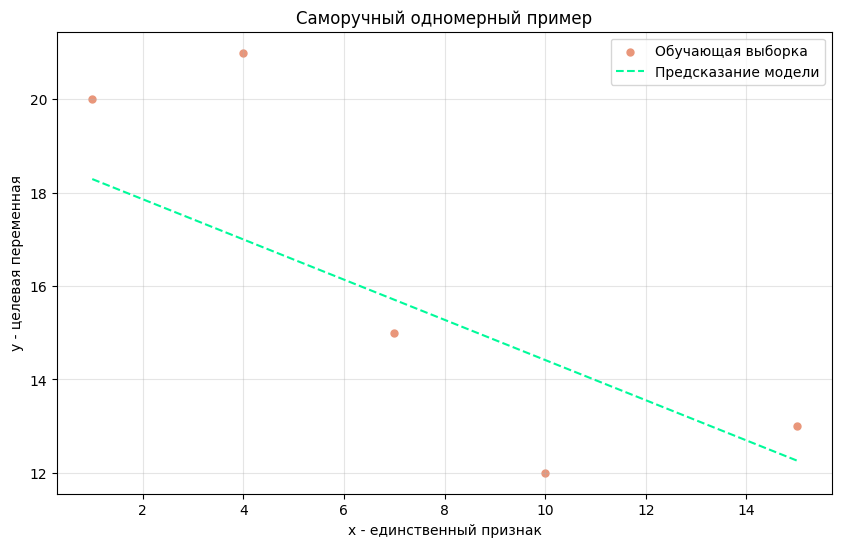

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(X1_train, Y1_train, color="#E9967A", s=25, label="Обучающая выборка")
plt.plot(X1_train, model1.get_weights() * X1_train + model1.get_bias(), "--", color="#00FA9A", label="Предсказание модели")
plt.title("Саморучный одномерный пример")
plt.xlabel("x - единственный признак")
plt.ylabel("y - целевая переменная")
plt.legend()
plt.grid(True, alpha=0.33)
plt.show()

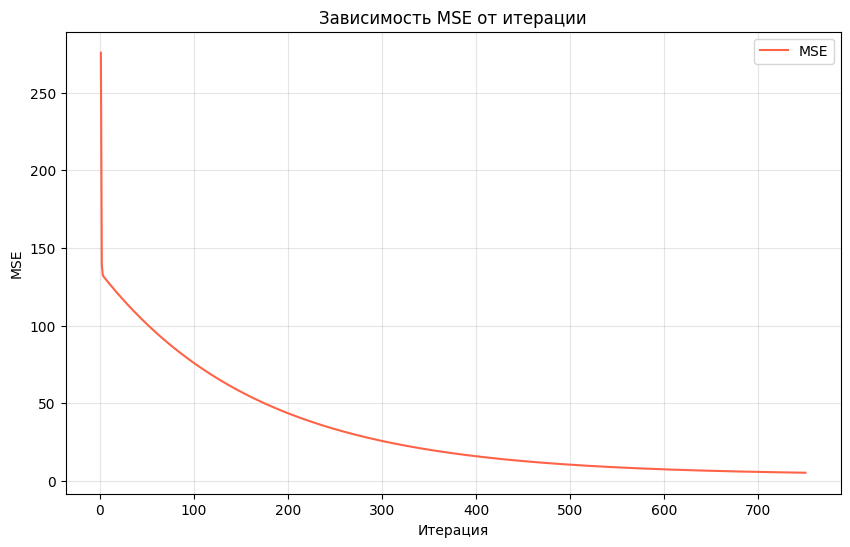

In [30]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, it1 + 1), model1.loss_history, color="#FF6347", label="MSE")
plt.grid(True, alpha=0.33)
plt.title("Зависимость MSE от итерации")
plt.xlabel("Итерация")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [31]:
np.random.seed(83)
X2_train = np.linspace(0, 10, 101).reshape(-1, 1)
true_weights = 2.5
true_bias = 1.0
Y2_train = true_weights * X2_train.flatten() + true_bias + np.random.normal(0, 1, 101)

it2 = 500
model2 = LinearRegression(iterations=it2)
model2.fit(X2_train, Y2_train)

print("Обученные параметры:")
print(model2)
print(f"\nИстинные параметры:\nw = {true_weights}, b = {true_bias}")

X2_test = np.array([[2.5], [5.0], [7.5]])
predictions = model2.predict(X2_test)
print(f"\nПредсказания для X = {X2_test.flatten()}:\n{predictions}")

Обученные параметры:
Веса: [2.53106646]
Смещение: 0.8194742482330104

Истинные параметры:
w = 2.5, b = 1.0

Предсказания для X = [2.5 5.  7.5]:
[ 7.1471404  13.47480656 19.80247271]


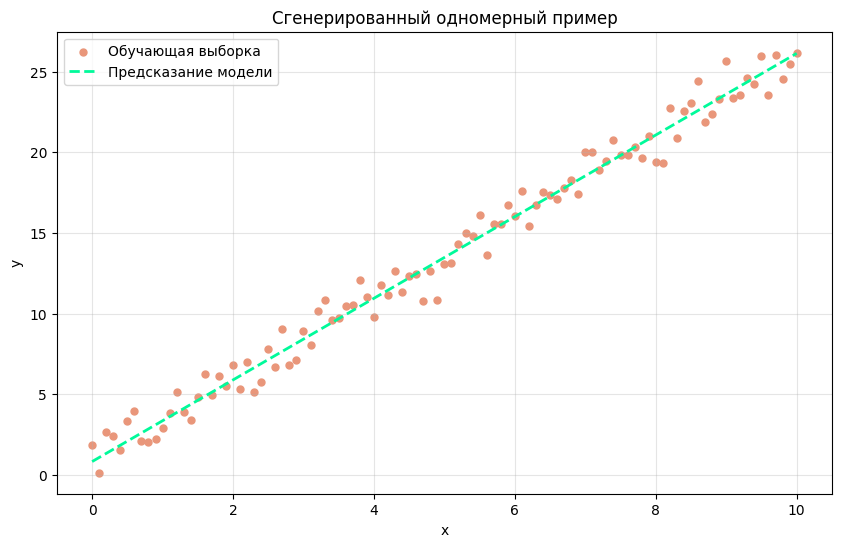

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(X2_train, Y2_train, color="#E9967A", s=25, label="Обучающая выборка")
plt.plot(X2_train, model2.get_weights() * X2_train + model2.get_bias(), "--", color="#00FA9A", lw=2, label="Предсказание модели")
plt.legend()
plt.title("Сгенерированный одномерный пример")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.33)
plt.show()

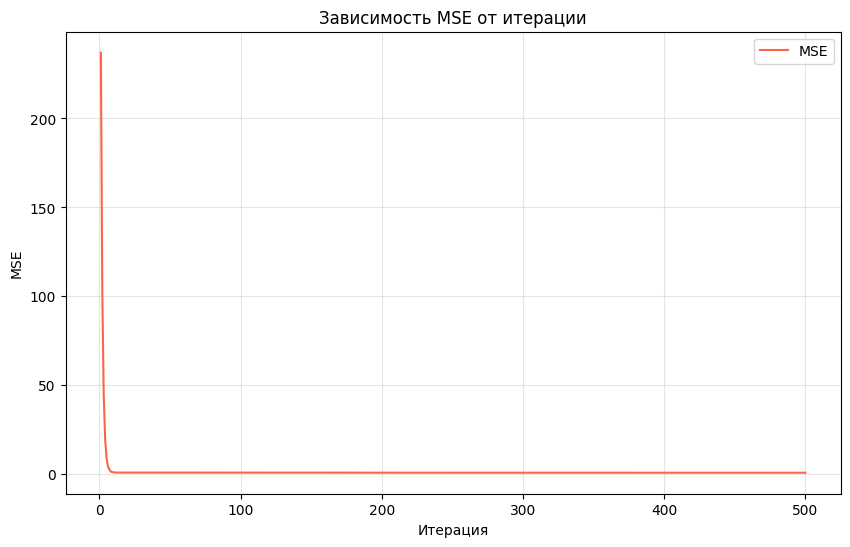

In [33]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, it2 + 1), model2.loss_history, color="#FF6347", label="MSE")
plt.grid(True, alpha=0.33)
plt.title("Зависимость MSE от итерации")
plt.xlabel("Итерация")
plt.ylabel("MSE")
plt.legend()
plt.show()